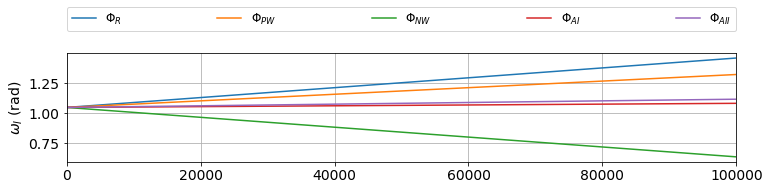

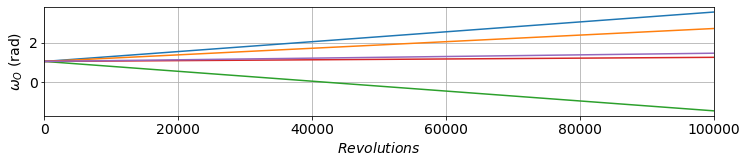

In [5]:
import numpy as np
from matplotlib import pyplot as plt

# Constant values
# Mass of the central object
m_3 = 1*10**7*2*10**(30)

# Total mass of the inner orbit M=m_1+m_2
M = 20*2*10**(30)
m_1=10*2*10**(30)
m_2=10*2*10**(30)
# Mass of the perturbing body in geometric unitsm=GM/c^2 
m = 0.1*2*10**(30)
c=3*10**8
G=6.674*10**(-11)
# Semi-major axis a of the inner and outer orbits
#a_I = 1
#a_O = 1*10**5
a_I = 1*1.496*10**(11)
a_O = 100000*1.496*10**(11)
#PPN parameters
gamma = 0.
beta = 0.
alpha = 0.

# Contributions to orbital elements per turn
def D_e_I(e_I, omega_I, iota_I, Omega_I, Omega_O, iota_O):
    De_I = (m_3*15*np.pi*a_I**3*e_I*(1-e_I**2)**(1/2))/(16*a_O**3*(1-e_O**2)**(3/2)*M)*(np.sin(iota_O)**2*\
    (np.cos(2*iota_I)+3)*np.sin(2*omega_I)*np.cos(2*(Omega_I-Omega_O))+4*np.sin(iota_O)**2*np.cos(iota_I)*np.cos(2*omega_I)*\
    np.sin(2*(Omega_I-Omega_O))-4*np.sin(2*iota_O)*np.sin(iota_I)*np.cos(2*omega_I)*np.sin(Omega_I-Omega_O)-2*\
    np.sin(2*iota_I)*np.sin(2*iota_O)*np.sin(2*omega_I)*np.cos(Omega_I-Omega_O)+np.sin(iota_I)**2*(3*np.cos(2*iota_O)+1)*\
    np.sin(2*omega_I))
    return De_I

def D_iota_I(e_I, omega_I, iota_I, Omega_I, Omega_O, iota_O):
    Diota_I = (m_3*3*np.pi*a_I**3)/(4*a_O**3*(1-e_O**2)**(3/2)*(1-e_I**2)**(1/2)*M)*(np.sin(iota_I)*\
    np.sin(iota_O)*np.cos(Omega_I-Omega_O)+np.cos(iota_I)*np.cos(iota_O))*(np.sin(iota_O)*np.sin(Omega_I-Omega_O)*\
    (5*e_I**2*np.cos(2*omega_I)+3*e_I**2+2)+5*e_I**2*np.sin(2*omega_I)*(np.sin(iota_O)*\
    np.cos(iota_I)*np.cos(Omega_I-Omega_O)-np.sin(iota_I)*np.cos(iota_O)))
    return Diota_I

def D_Omega_I(e_I, omega_I, iota_I, Omega_I, Omega_O, iota_O):
    DOmega_I  =(m_3*3*np.pi*a_I**3)/(np.sin(iota_I)*4*a_O**3*(1-e_O**2)**(3/2)*(1-e_I**2)**(1/2)*M)*(np.sin(iota_O)*\
    np.sin(iota_I)*np.cos(Omega_I-Omega_O)+np.cos(iota_O)*np.cos(iota_I))*(5*e_I**2*np.sin(iota_O)*np.sin(2*omega_I)*\
    np.sin(Omega_I-Omega_O)+(5*e_I**2*np.cos(2*omega_I)-3*e_I**2-2)*(np.sin(iota_I)*np.cos(iota_O)-np.sin(iota_O)*\
    np.cos(iota_I)*np.cos(Omega_I-Omega_O)))
    return DOmega_I

def D_omega_I(e_I, omega_I, iota_I, Omega_I, Omega_O, iota_O):
    Domega_I =  (m_3*3*np.pi*a_I**3*(1-e_I**2)**(1/2))/(8*a_O**3*(1-e_O**2)**(3/2)*M)*(10*np.sin(iota_I)*\
    np.sin(2*iota_O)*np.sin(2*omega_I)*np.sin(Omega_I-Omega_O)+np.sin(iota_O)**2*np.cos(2*(Omega_I-Omega_O))*\
    (2*np.sin(iota_I)**2*(4-5*np.cos(omega_I)**2)+20*np.cos(omega_I)**2-10)-10*np.sin(iota_O)**2*np.cos(iota_I)*\
    np.sin(2*omega_I)*np.sin(2*(Omega_I-Omega_O))+np.sin(2*iota_I)*np.sin(2*iota_O)*(3-5*np.cos(2*omega_I))*\
    np.cos(Omega_I-Omega_O)+(3*np.cos(2*iota_O)+1)*(np.sin(iota_I)**2*(5*np.cos(omega_I)**2-4)+1))-\
    (m_3*3*np.pi*a_I**3*np.cos(iota_I))/(np.sin(iota_I)*4*a_O**3*(1-e_O**2)**(3/2)*(1-e_I**2)**(1/2)*M)*(np.sin(iota_O)*\
    np.sin(iota_I)*np.cos(Omega_I-Omega_O)+np.cos(iota_O)*np.cos(iota_I))*(5*e_I**2*np.sin(iota_O)*np.sin(2*omega_I)*\
    np.sin(Omega_I-Omega_O)+(5*e_I**2*np.cos(2*omega_I)-3*e_I**2-2)*(np.sin(iota_I)*np.cos(iota_O)-np.sin(iota_O)*\
    np.cos(iota_I)*np.cos(Omega_I-Omega_O)))+6*np.pi*G*M/(c**2*a_I*(1-e_I**2))
    return Domega_I

def D_iota_O(e_I, omega_I, iota_I, Omega_I, Omega_O, iota_O):
    Diota_O = (m_3**(1/2)*m_1*m_2*3*np.pi*a_I**(7/2))/(4*a_O**(7/2)*(1-e_O**2)**2*M**(5/2))*(np.sin(iota_O)*\
    (np.sin(2*(Omega_I-Omega_O))*(np.sin(iota_I)**2*\
    (-5*e_I**2*np.cos(omega_I)**2+4*e_I**2+1)+10*e_I**2*np.cos(omega_I)**2-5*e_I**2)+5*e_I**2*np.cos(iota_I)*\
    np.sin(2*omega_I)*np.cos(2*(Omega_I-Omega_O)))+np.cos(iota_O)*(np.sin(2*iota_I)*np.sin(Omega_I-Omega_O)*\
    (-5*e_I**2*np.cos(omega_I)**2+4*e_I**2+1)-5*e_I**2*np.sin(iota_I)*np.sin(2*omega_I)*np.cos(Omega_I-Omega_O))) 
    return Diota_O

def D_Omega_O(e_I, omega_I, iota_I, Omega_I, Omega_O, iota_O):
    DOmega_O = (m_3**(1/2)*m_1*m_2*3*np.pi*a_I**(7/2))/(np.sin(iota_O)*8*a_O**(7/2)*(1-e_O**2)**2*M**(5/2))*\
    (np.sin(2*iota_O)*((1/2)*np.sin(iota_I)**2*(np.cos(2*(Omega_I-Omega_O))+3)*(5*e_I**2*np.cos(2*omega_I)-3*e_I**2-2)+\
    5*e_I**2*np.cos(iota_I)*np.sin(2*omega_I)*np.sin(2*(Omega_I-Omega_O))-5*e_I**2*np.cos(2*omega_I)*\
    np.cos(2*(Omega_I-Omega_O))+3*e_I**2+2)+np.cos(2*iota_O)*(np.sin(2*iota_I)*np.cos(Omega_I-Omega_O)*\
    (5*e_I**2*np.cos(2*omega_I)-3*e_I**2-2)-10*e_I**2*np.sin(iota_I)*np.sin(2*omega_I)*np.sin(Omega_I-Omega_O)))  
    return DOmega_O

def D_omega_O(e_I, omega_I, iota_I, Omega_I, Omega_O, iota_O):
    Domega_O =(3*np.pi*m_3**(1/2)*m_1*m_2*a_I**(7/2))/(16*a_O**(7/2)*(1-e_O**2)**2*M**(5/2))*(30*e_I**2*np.sin(iota_I)*\
    np.sin(2*iota_O)*np.sin(2*omega_I)*np.sin(Omega_I-Omega_O)-30*e_I**2*np.sin(iota_O)**2*np.cos(iota_O)*\
    np.sin(2*omega_I)*np.sin(2*(Omega_I-Omega_O))+3*np.sin(iota_O)**2*np.cos(2*(Omega_I-Omega_O))*(np.sin(iota_I)**2*\
    (-5*e_I**2*np.cos(2*omega_I)+3*e_I**2+2)+10*e_I**2*np.cos(2*omega_I))+3*np.sin(2*iota_I)*np.sin(2*iota_O)*\
    np.cos(Omega_I-Omega_O)*(-5*e_I**2*np.cos(2*omega_I)+3*e_I**2+2)+(2-3*np.sin(iota_O)**2)*(np.sin(iota_I)**2*\
    (15*e_I**2*np.cos(2*omega_I)-9*e_I**2-6)+6*e_I**2+4))-\
    (np.cos(iota_O)*m_3**(1/2)*m_1*m_2*3*np.pi*a_I**(7/2))/(np.sin(iota_O)*8*a_O**(7/2)*(1-e_O**2)**2*M**(5/2))*\
    (np.sin(2*iota_O)*((1/2)*np.sin(iota_I)**2*(np.cos(2*(Omega_I-Omega_O))+3)*(5*e_I**2*np.cos(2*omega_I)-3*e_I**2-2)+\
    5*e_I**2*np.cos(iota_I)*np.sin(2*omega_I)*np.sin(2*(Omega_I-Omega_O))-5*e_I**2*np.cos(2*omega_I)*\
    np.cos(2*(Omega_I-Omega_O))+3*e_I**2+2)+np.cos(2*iota_O)*(np.sin(2*iota_I)*np.cos(Omega_I-Omega_O)*\
    (5*e_I**2*np.cos(2*omega_I)-3*e_I**2-2)-10*e_I**2*np.sin(iota_I)*np.sin(2*omega_I)*np.sin(Omega_I-Omega_O)))
    return Domega_O

def D_omegaR1_I(e_I):
    DomegaR1_I=6*np.pi*G*M/(c**2*a_I*(1-e_I**2))
    return DomegaR1_I

def D_omegaR2_I(e_I):
    DomegaR2_I=4*np.pi*G*M/(c**2*a_I*(1-e_I**2))
    return DomegaR2_I

def D_omegaR3_I(e_I):
    DomegaR3_I=-6*np.pi*G*M/(c**2*a_I*(1-e_I**2))
    return DomegaR3_I

def D_omegaR4_I(e_I):
    DomegaR4_I=(1/2)*np.pi*G*M/(c**2*a_I*(1-e_I**2))
    return DomegaR4_I

def D_omegaR5_I(e_I):
    DomegaR5_I=np.pi*G*M/(c**2*a_I*(1-e_I**2))
    return DomegaR5_I

  

# Initial values of the orbital elements for two orbits
e0_I = 0.3
e_I1 = 0.3
omega0_I = np.pi/3
iota0_I =np.pi/3
Omega0_I = np.pi/32 
e_O = 0.5
Omega0_O = np.pi/6
iota0_O =np.pi/12
omega0_O = np.pi/3

# Turns
n = 100000
t = np.arange(n)


e_I = np.zeros(n)
omega_I = np.zeros(n)
iota_I = np.zeros(n)
Omega_I = np.zeros(n)
Omega_O = np.zeros(n)
iota_O = np.zeros(n)
omega_O = np.zeros(n)

omegaR1_I=np.zeros(n)
omegaR2_I=np.zeros(n)
omegaR3_I=np.zeros(n)
omegaR4_I=np.zeros(n)
omegaR5_I=np.zeros(n)
omegaR1_O=np.zeros(n)
omegaR2_O=np.zeros(n)
omegaR3_O=np.zeros(n)
omegaR4_O=np.zeros(n)
omegaR5_O=np.zeros(n)

omega0R1_I=np.pi/3
omega0R2_I=np.pi/3
omega0R3_I=np.pi/3
omega0R4_I=np.pi/3
omega0R5_I=np.pi/3
omega0R1_O=np.pi/3
omega0R2_O=np.pi/3
omega0R3_O=np.pi/3
omega0R4_O=np.pi/3
omega0R5_O=np.pi/3

#Iteration cycle
for i in t:
    e_I[i] = e0_I 
    omega_I[i] = omega0_I
    iota_I[i] = iota0_I
    Omega_I[i] = Omega0_I
    iota_O[i] = iota0_O
    Omega_O[i] = Omega0_O
    omega_O[i] = omega0_O
    e0_I = e0_I + D_e_I(e0_I, omega0_I, iota0_I, Omega0_I, Omega0_O, iota0_O)
    # This conditional recognizes a numerical zero in Delta omega to prevent a numerical error due to a cumulative effect
    if D_omega_I(e0_I, omega0_I, iota0_I, Omega0_I, Omega0_O, iota0_O).any()<1E-16:
        omega0_I = omega0_I
    else:
        omega0_I = omega0_I + D_omega_I(e0_I, omega0_I, iota0_I, Omega0_I, Omega0_O, iota0_O)
    iota0_I = iota0_I + D_iota_I(e0_I, omega0_I, iota0_I, Omega0_I, Omega0_O, iota0_O)
    iota0_O = iota0_O + D_iota_O(e0_I, omega0_I, iota0_I, Omega0_I, Omega0_O, iota0_O)
    Omega0_I = Omega0_I + D_Omega_I(e0_I, omega0_I, iota0_I, Omega0_I, Omega0_O, iota0_O)
    Omega0_O = Omega0_O + D_Omega_O(e0_I, omega0_I, iota0_I, Omega0_I, Omega0_O, iota0_O)
    omega0_O = omega0_O + D_omega_O(e0_I, omega0_I, iota0_I, Omega0_I, Omega0_O, iota0_O)
    omegaR1_I[i]=omega0R1_I
    omegaR2_I[i]=omega0R2_I
    omegaR3_I[i]=omega0R3_I
    omegaR4_I[i]=omega0R4_I
    omegaR5_I[i]=omega0R5_I
    omegaR1_O[i]=omega0R1_O
    omegaR2_O[i]=omega0R2_O
    omegaR3_O[i]=omega0R3_O
    omegaR4_O[i]=omega0R4_O
    omegaR5_O[i]=omega0R5_O
    omega0R1_I=omega0R1_I+6*np.pi*G*M/(c**2*a_I*(1-e_I1**2))
    omega0R2_I=omega0R2_I+4*np.pi*G*M/(c**2*a_I*(1-e_I1**2))
    omega0R3_I=omega0R3_I-6*np.pi*G*M/(c**2*a_I*(1-e_I1**2))
    omega0R4_I=omega0R4_I+(1/2)*np.pi*G*M/(c**2*a_I*(1-e_I1**2))
    omega0R5_I=omega0R5_I+np.pi*G*M/(c**2*a_I*(1-e_I1**2))
    omega0R1_O=omega0R1_O+6*np.pi*G*m_3/(c**2*a_O*(1-e_O**2))
    omega0R2_O=omega0R2_O+4*np.pi*G*m_3/(c**2*a_O*(1-e_O**2))
    omega0R3_O=omega0R3_O-6*np.pi*G*m_3/(c**2*a_O*(1-e_O**2))
    omega0R4_O=omega0R4_O+1/2*np.pi*G*m_3/(c**2*a_O*(1-e_O**2))
    omega0R5_O=omega0R5_O+np.pi*G*m_3/(c**2*a_O*(1-e_O**2))


#Plot of secular evolutions  

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(12,2))
plt.plot(t,omegaR1_I)
plt.plot(t,omegaR2_I)
plt.plot(t,omegaR3_I)
plt.plot(t,omegaR4_I)
plt.plot(t,omegaR5_I)
plt.grid()
plt.legend(('$\Phi_{R}$', '$\Phi_{PW}$', '$\Phi_{NW}$', '$\Phi_{AI}$', '$\Phi_{AII}$'),
prop = {'size': 12},bbox_to_anchor=(0,1.2,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=5)
#plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.ylabel(r'$\omega_I$ (rad)')
plt.xlim(0,100000)
plt.savefig("secular43", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,2))
plt.plot(t,omegaR1_O)
plt.plot(t,omegaR2_O)
plt.plot(t,omegaR3_O)
plt.plot(t,omegaR4_O)
plt.plot(t,omegaR5_O)
plt.grid()

plt.ylabel(r'$\omega_O$ (rad)')
plt.xlim(0,100000)
plt.xlabel(r'$Revolutions$')
plt.savefig("secular44", dpi=300, bbox_inches='tight')
plt.show()
